# Intel Image Project

We'll work with [Intel Image Classification dataset](https://www.kaggle.com/puneet6060/intel-image-classification/version/2) from kaggle.

This is image data of natural scenes around the world. It contains around 25k images of size 150x150 distributed under 6 categories.
The train, test and prediction data is separated in each zip files. There are around 14k images in train, 3k in test and 7k in trediction directory.

## Import the data

In [1]:
! mkdir ~/.kaggle # create the .kaggle folder in the root directory
! echo '{"username":"panagiotis427","key":"ba4ea9629536514c923394e01146f747"}' > ~/.kaggle/kaggle.json # write kaggle API credentials to kaggle.json
! chmod 600 ~/.kaggle/kaggle.json  # set permissions
! pip install kaggle # install the kaggle library

In [2]:
! kaggle datasets download -d puneet6060/intel-image-classification/version/2 -p /content/kaggle/

 99% 343M/346M [00:02<00:00, 182MB/s]
100% 346M/346M [00:02<00:00, 161MB/s]


In [3]:
%cd kaggle
! unzip intel-image-classification

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/769

> 🔑 **Note:** If you're using Google Colab and your runtime disconnects, you may have to redownload the files. You can do this by rerunning the cells above.

## View the data 

`ls` stands for list.

In [4]:
!ls seg_train/seg_train

buildings  forest  glacier  mountain  sea  street


In [5]:
!ls seg_train/seg_train/forest

10007.jpg  12404.jpg  1505.jpg	 17711.jpg  2294.jpg  4972.jpg	7683.jpg
10010.jpg  12431.jpg  15060.jpg  17715.jpg  2306.jpg  4983.jpg	7686.jpg
10020.jpg  12447.jpg  15067.jpg  17721.jpg  2307.jpg  4985.jpg	768.jpg
10030.jpg  12456.jpg  1507.jpg	 17730.jpg  2310.jpg  49.jpg	7694.jpg
10037.jpg  12457.jpg  15085.jpg  17735.jpg  2312.jpg  5001.jpg	7696.jpg
1004.jpg   12469.jpg  15104.jpg  17739.jpg  2314.jpg  5002.jpg	769.jpg
10050.jpg  12474.jpg  15106.jpg  1773.jpg   231.jpg   5003.jpg	7704.jpg
10051.jpg  12488.jpg  15107.jpg  17743.jpg  2331.jpg  5006.jpg	7709.jpg
10074.jpg  12490.jpg  15117.jpg  17780.jpg  2333.jpg  5014.jpg	7720.jpg
10078.jpg  12499.jpg  15121.jpg  17811.jpg  2335.jpg  501.jpg	7724.jpg
10086.jpg  1249.jpg   15126.jpg  17818.jpg  2339.jpg  5024.jpg	7747.jpg
10088.jpg  12506.jpg  15133.jpg  1781.jpg   2345.jpg  502.jpg	7756.jpg
10089.jpg  12520.jpg  15135.jpg  17823.jpg  2357.jpg  5030.jpg	7773.jpg
10098.jpg  12539.jpg  15143.jpg  17827.jpg  2360.jpg  5049.jpg	778.jpg
1

In [6]:
import os

# Walk through seg_train directory and list number of files
for dirpath, dirnames, filenames in os.walk("seg_train"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 1 directories and 0 images in 'seg_train'.
There are 6 directories and 0 images in 'seg_train/seg_train'.
There are 0 directories and 2382 images in 'seg_train/seg_train/street'.
There are 0 directories and 2512 images in 'seg_train/seg_train/mountain'.
There are 0 directories and 2404 images in 'seg_train/seg_train/glacier'.
There are 0 directories and 2274 images in 'seg_train/seg_train/sea'.
There are 0 directories and 2271 images in 'seg_train/seg_train/forest'.
There are 0 directories and 2191 images in 'seg_train/seg_train/buildings'.


In [7]:
# Another way to find out how many images are in a file
num_specific_class_train = len(os.listdir("seg_train/seg_train/forest"))
num_specific_class_train

2271

In [8]:
train_dir = "seg_train/seg_train/"
pred_dir = "seg_pred/"
test_dir = "seg_test/seg_test/"

In [9]:
# Get the class names 
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir) # turn the training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']


In [10]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (150, 150, 3)


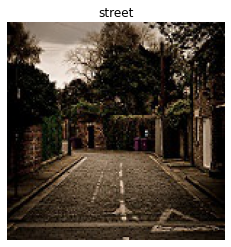

In [11]:
# View a random image from the training dataset
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

## Preprocess the data

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Dropout, MaxPool2D, Flatten, Dense

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
pred_datagen = ImageDataGenerator(rescale=1./255)

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(150, 150), # convert all images to be 150 x 150
                                               class_mode="categorical") # type of problem we're working on

test_data = test_datagen.flow_from_directory(test_dir,
                                             batch_size=32,
                                             target_size=(150, 150),
                                             class_mode="categorical")

pred_data = pred_datagen.flow_from_directory(pred_dir,
                                             batch_size=32,
                                             target_size=(150, 150),
                                             class_mode="categorical")

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Found 7301 images belonging to 1 classes.


In [13]:
train_data

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

## Monitoring loss across different lrs

In [ ]:
# Build the model
model_1 = Sequential([
  Conv2D(8, 3, input_shape=(150, 150, 3), padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Conv2D(16, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Conv2D(32, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Conv2D(64, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Flatten(),
  Dense(240),
  Activation('relu'),
  Dropout(0.1),
  Dense(120),
  Activation('relu'),
  Dropout(0.1),
  Dense(24),
  Activation('relu'),
  Dropout(0.1),
  Dense(6), # number of neurons same as number of classes
  Activation('softmax')
])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=40,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        callbacks=[lr_scheduler])

Epoch 1/40
439/439 [==============================] - 40s 60ms/step - loss: 1.1457 - accuracy: 0.5493 - val_loss: 1.0379 - val_accuracy: 0.5960 - lr: 0.0010
Epoch 2/40
439/439 [==============================] - 27s 61ms/step - loss: 0.7616 - accuracy: 0.7242 - val_loss: 1.7690 - val_accuracy: 0.4517 - lr: 0.0011
Epoch 3/40
439/439 [==============================] - 25s 56ms/step - loss: 0.6591 - accuracy: 0.7727 - val_loss: 0.6734 - val_accuracy: 0.7550 - lr: 0.0013
Epoch 4/40
439/439 [==============================] - 25s 56ms/step - loss: 0.5992 - accuracy: 0.7873 - val_loss: 0.5732 - val_accuracy: 0.7870 - lr: 0.0014
Epoch 5/40
439/439 [==============================] - 25s 57ms/step - loss: 0.5699 - accuracy: 0.8001 - val_loss: 1.0191 - val_accuracy: 0.6620 - lr: 0.0016
Epoch 6/40
439/439 [==============================] - 25s 57ms/step - loss: 0.5228 - accuracy: 0.8188 - val_loss: 0.6288 - val_accuracy: 0.7617 - lr: 0.0018
Epoch 7/40
439/439 [==============================] - 25s 

Text(0.5, 1.0, 'Finding the ideal learning rate')

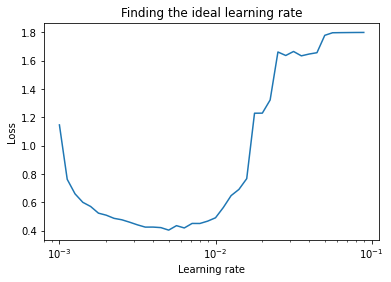

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_1.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

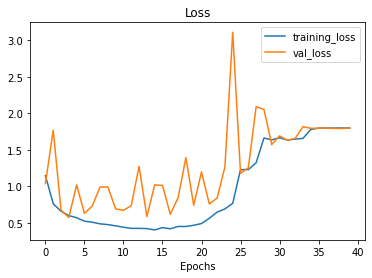

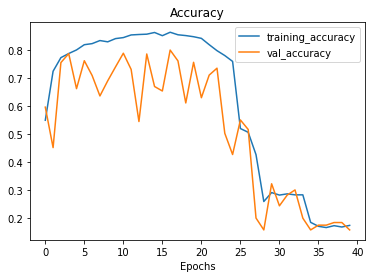

In [ ]:
# Check out model's performance
plot_loss_curves(history_1)

## Same but lrs start from 1e-4

In [ ]:
# Build the model
model_2 = Sequential([
  Conv2D(8, 3, input_shape=(150, 150, 3), padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Conv2D(16, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Conv2D(32, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Conv2D(64, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Flatten(),
  Dense(240),
  Activation('relu'),
  Dropout(0.1),
  Dense(120),
  Activation('relu'),
  Dropout(0.1),
  Dense(24),
  Activation('relu'),
  Dropout(0.1),
  Dense(6), # number of neurons same as number of classes
  Activation('softmax')
])

# Compile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Create the learning rate callback
lr_scheduler_2 = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=40,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        callbacks=[lr_scheduler_2])

Epoch 1/40
439/439 [==============================] - 38s 64ms/step - loss: 1.1761 - accuracy: 0.5435 - val_loss: 1.1424 - val_accuracy: 0.5627 - lr: 1.0000e-04
Epoch 2/40
439/439 [==============================] - 27s 62ms/step - loss: 0.8943 - accuracy: 0.6722 - val_loss: 1.3691 - val_accuracy: 0.4880 - lr: 1.1220e-04
Epoch 3/40
439/439 [==============================] - 29s 67ms/step - loss: 0.7753 - accuracy: 0.7212 - val_loss: 0.8070 - val_accuracy: 0.7023 - lr: 1.2589e-04
Epoch 4/40
439/439 [==============================] - 26s 60ms/step - loss: 0.6733 - accuracy: 0.7606 - val_loss: 0.8827 - val_accuracy: 0.6760 - lr: 1.4125e-04
Epoch 5/40
439/439 [==============================] - 26s 60ms/step - loss: 0.6175 - accuracy: 0.7805 - val_loss: 1.1068 - val_accuracy: 0.6397 - lr: 1.5849e-04
Epoch 6/40
439/439 [==============================] - 26s 60ms/step - loss: 0.5639 - accuracy: 0.8011 - val_loss: 0.6641 - val_accuracy: 0.7693 - lr: 1.7783e-04
Epoch 7/40
439/439 [==============

Text(0.5, 1.0, 'Finding the ideal learning rate')

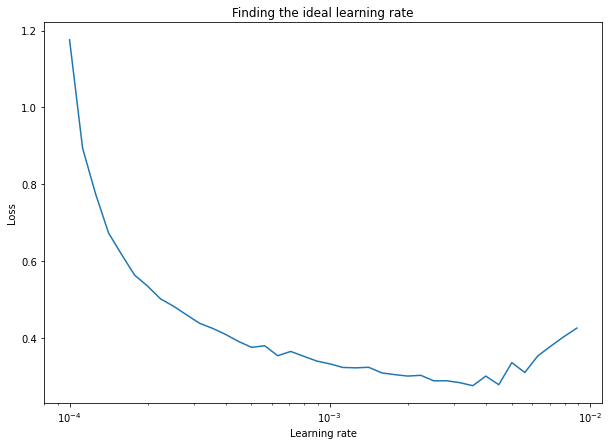

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-4 * (10**(tf.range(40)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_2.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

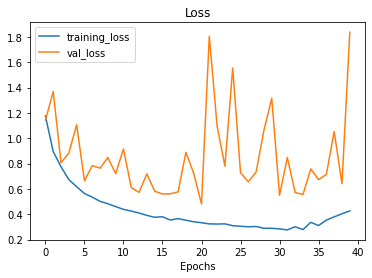

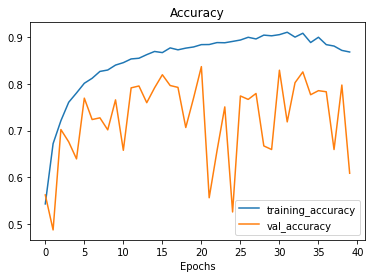

In [ ]:
# Check out model's performance
plot_loss_curves(history_2)

## Trying different lrs

In [ ]:
# Build the model
model_4 = Sequential([
  Conv2D(8, 3, input_shape=(150, 150, 3), padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Conv2D(16, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Conv2D(32, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Conv2D(64, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Flatten(),
  Dense(240),
  Activation('relu'),
  Dropout(0.1),
  Dense(120),
  Activation('relu'),
  Dropout(0.1),
  Dense(24),
  Activation('relu'),
  Dropout(0.1),
  Dense(6), # number of neurons same as number of classes
  Activation('softmax')
])

# Compile the model
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0012),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=8,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/8
439/439 [==============================] - 34s 47ms/step - loss: 1.1413 - accuracy: 0.5621 - val_loss: 1.0065 - val_accuracy: 0.6183
Epoch 2/8
439/439 [==============================] - 20s 45ms/step - loss: 0.7599 - accuracy: 0.7280 - val_loss: 0.8658 - val_accuracy: 0.6790
Epoch 3/8
439/439 [==============================] - 22s 50ms/step - loss: 0.6568 - accuracy: 0.7695 - val_loss: 0.8336 - val_accuracy: 0.6680
Epoch 4/8
439/439 [==============================] - 20s 46ms/step - loss: 0.5993 - accuracy: 0.7904 - val_loss: 0.6399 - val_accuracy: 0.7750
Epoch 5/8
439/439 [==============================] - 20s 47ms/step - loss: 0.5436 - accuracy: 0.8082 - val_loss: 0.7038 - val_accuracy: 0.7370
Epoch 6/8
439/439 [==============================] - 21s 47ms/step - loss: 0.5081 - accuracy: 0.8236 - val_loss: 0.5184 - val_accuracy: 0.8120
Epoch 7/8
439/439 [==============================] - 20s 46ms/step - loss: 0.4734 - accuracy: 0.8338 - val_loss: 0.5384 - val_accuracy: 0.8100

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

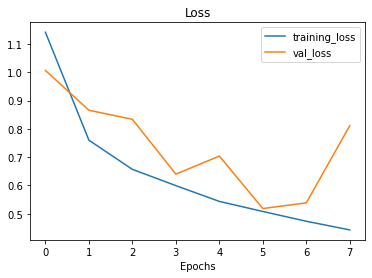

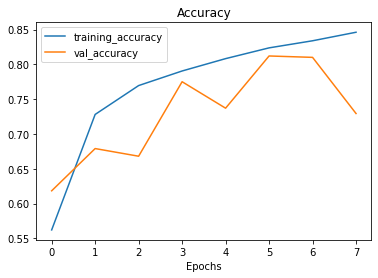

In [ ]:
# Check out model's performance
plot_loss_curves(history_4)

lr = 0.0007 και 0.0017 performed worse on average

## Trying `reduce lr on plateau` and `model checkpoint`

In [ ]:
# Build the model
model_5 = Sequential([
  Conv2D(8, 3, input_shape=(150, 150, 3), padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Conv2D(16, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Conv2D(32, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Conv2D(64, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Flatten(),
  Dense(240),
  Activation('relu'),
  Dropout(0.1),
  Dense(120),
  Activation('relu'),
  Dropout(0.1),
  Dense(24),
  Activation('relu'),
  Dropout(0.1),
  Dense(6), # number of neurons same as number of classes
  Activation('softmax')
])

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.91, patience=2, verbose=1, mode='min', min_lr=0.0006)

# Compile the model
model_5.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0011),
                metrics=["accuracy"])

In [ ]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    verbose=1,
    mode='max',
    save_best_only=True)

# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=20,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        callbacks=[reduce_lr, model_checkpoint_callback])

Epoch 1/20
439/439 [==============================] - ETA: 0s - loss: 1.5569 - accuracy: 0.3348
Epoch 00001: val_accuracy improved from -inf to 0.36833, saving model to /tmp/checkpoint
439/439 [==============================] - 27s 59ms/step - loss: 1.5569 - accuracy: 0.3348 - val_loss: 1.7130 - val_accuracy: 0.3683 - lr: 0.0011
Epoch 2/20
438/439 [============================>.] - ETA: 0s - loss: 1.0747 - accuracy: 0.5533
Epoch 00002: val_accuracy improved from 0.36833 to 0.63533, saving model to /tmp/checkpoint
439/439 [==============================] - 25s 57ms/step - loss: 1.0741 - accuracy: 0.5535 - val_loss: 0.9970 - val_accuracy: 0.6353 - lr: 0.0011
Epoch 3/20
438/439 [============================>.] - ETA: 0s - loss: 0.8458 - accuracy: 0.6756
Epoch 00003: val_accuracy improved from 0.63533 to 0.67000, saving model to /tmp/checkpoint
439/439 [==============================] - 26s 58ms/step - loss: 0.8457 - accuracy: 0.6759 - val_loss: 0.8649 - val_accuracy: 0.6700 - lr: 0.0011
E

In [ ]:
# The model weights (that are considered the best) are loaded into the model.
model_5.load_weights(checkpoint_filepath)

# Save the model
model_5.save("saved_trained_model")

INFO:tensorflow:Assets written to: saved_trained_model/assets


In [ ]:
# Load in the model and evaluate it
loaded_model_5 = tf.keras.models.load_model("saved_trained_model")
model_5.load_weights(checkpoint_filepath)
loaded_model_5.evaluate(test_data)

OSError: ignored

In [ ]:
# Build the model
model_5 = Sequential([
  Conv2D(8, 3, input_shape=(150, 150, 3), padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Conv2D(16, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Conv2D(32, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Conv2D(64, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Flatten(),
  Dense(240),
  Activation('relu'),
  Dropout(0.1),
  Dense(120),
  Activation('relu'),
  Dropout(0.1),
  Dense(24),
  Activation('relu'),
  Dropout(0.1),
  Dense(6), # number of neurons same as number of classes
  Activation('softmax')
])

# Compile the model
model_5.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    verbose=1,
    mode='max',
    save_best_only=True)

# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=20,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        callbacks=[model_checkpoint_callback])

Epoch 1/20
439/439 [==============================] - ETA: 0s - loss: 0.1758 - accuracy: 0.9383
Epoch 00001: val_accuracy improved from -inf to 0.82567, saving model to /tmp/checkpoint
439/439 [==============================] - 26s 58ms/step - loss: 0.1758 - accuracy: 0.9383 - val_loss: 0.5918 - val_accuracy: 0.8257
Epoch 2/20
439/439 [==============================] - ETA: 0s - loss: 0.1743 - accuracy: 0.9414
Epoch 00002: val_accuracy improved from 0.82567 to 0.83267, saving model to /tmp/checkpoint
439/439 [==============================] - 25s 57ms/step - loss: 0.1743 - accuracy: 0.9414 - val_loss: 0.5454 - val_accuracy: 0.8327
Epoch 3/20
438/439 [============================>.] - ETA: 0s - loss: 0.1558 - accuracy: 0.9464
Epoch 00003: val_accuracy improved from 0.83267 to 0.84167, saving model to /tmp/checkpoint
439/439 [==============================] - 25s 56ms/step - loss: 0.1564 - accuracy: 0.9462 - val_loss: 0.5681 - val_accuracy: 0.8417
Epoch 4/20
439/439 [====================

In [ ]:
# The model weights (that are considered the best) are loaded into the model.
model_5.load_weights(checkpoint_filepath)

# Save the model
model_5.save("saved_trained_model")

INFO:tensorflow:Assets written to: saved_trained_model/assets


In [ ]:
# Load in the model and evaluate it
loaded_model_5 = tf.keras.models.load_model("saved_trained_model")
model_5.load_weights(checkpoint_filepath)
loaded_model_5.evaluate(test_data)

94/94 [==============================] - 4s 39ms/step - loss: 0.5372 - accuracy: 0.8423


[0.5371677875518799, 0.8423333168029785]

## Adding more convolution layers and trying again

In [ ]:
# Build the model
model_6 = Sequential([
  Conv2D(8, 3, input_shape=(150, 150, 3), padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Conv2D(8, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Conv2D(16, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Conv2D(16, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Conv2D(32, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Conv2D(32, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Conv2D(64, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Conv2D(64, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Flatten(),
  Dense(240),
  Activation('relu'),
  Dropout(0.1),
  Dense(120),
  Activation('relu'),
  Dropout(0.1),
  Dense(24),
  Activation('relu'),
  Dropout(0.1),
  Dense(6), # number of neurons same as number of classes
  Activation('softmax')
])

reduce_lr2 = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.91, patience=2, verbose=1, mode='min', min_lr=0.0006)

# Compile the model
model_6.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0011),
                metrics=["accuracy"])

In [ ]:
checkpoint2_filepath = '/tmp/checkpoint2'
model_checkpoint2_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint2_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    verbose=1,
    mode='max',
    save_best_only=True)

# Fit the model
history_6 = model_6.fit(train_data,
                        epochs=20,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        callbacks=[reduce_lr2, model_checkpoint2_callback])

Epoch 1/20
439/439 [==============================] - ETA: 0s - loss: 1.1499 - accuracy: 0.5484
Epoch 00001: val_accuracy improved from -inf to 0.56933, saving model to /tmp/checkpoint2
439/439 [==============================] - 24s 51ms/step - loss: 1.1499 - accuracy: 0.5484 - val_loss: 1.0965 - val_accuracy: 0.5693 - lr: 0.0011
Epoch 2/20
439/439 [==============================] - ETA: 0s - loss: 0.7693 - accuracy: 0.7243
Epoch 00002: val_accuracy improved from 0.56933 to 0.70867, saving model to /tmp/checkpoint2
439/439 [==============================] - 23s 53ms/step - loss: 0.7693 - accuracy: 0.7243 - val_loss: 0.7743 - val_accuracy: 0.7087 - lr: 0.0011
Epoch 3/20
438/439 [============================>.] - ETA: 0s - loss: 0.6467 - accuracy: 0.7764
Epoch 00003: val_accuracy improved from 0.70867 to 0.75833, saving model to /tmp/checkpoint2
439/439 [==============================] - 22s 51ms/step - loss: 0.6466 - accuracy: 0.7765 - val_loss: 0.6648 - val_accuracy: 0.7583 - lr: 0.001

In [ ]:
# The model weights (that are considered the best) are loaded into the model.
model_6.load_weights(checkpoint2_filepath)

# Save the model
model_6.save("saved_trained_model_6")

In [ ]:
# Load in the model and evaluate it
loaded_model_6 = tf.keras.models.load_model("saved_trained_model_6")
model_6.load_weights(checkpoint2_filepath)
loaded_model_6.evaluate(test_data)

## Data albumentation

In [ ]:
! pip install -U albumentations

In [ ]:
! pip uninstall opencv-python-headless==4.5.5.62n

Found existing installation: opencv-python-headless 4.5.2.52
Uninstalling opencv-python-headless-4.5.2.52:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.5.2.52.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-8daa01ff.so.58.109.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-06a336f2.so.58.61.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-01d48d95.so.56.60.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-098682aa.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libpng15-c2ffaf3d.so.15.13.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libssl-f3db6a3b.so.1.1
    /usr/local/lib/python3.7/dist-package

In [ ]:
! pip install opencv-python-headless==4.5.2.52

  Using cached opencv_python_headless-4.5.2.52-cp37-cp37m-manylinux2014_x86_64.whl (38.2 MB)


In [ ]:
import albumentations as A
import cv2

transform = A.Compose([
    A.RandomCrop(width=90, height=90),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])

In [ ]:
image = cv2.imread("/content/kaggle/seg_train/seg_train/forest/10007.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
transformed = transform(image=image)

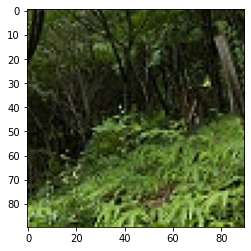

In [ ]:
transformed_image = transformed["image"]
plt.imshow(transformed_image);

In [ ]:
for dirpath, dirnames, filenames in os.walk("seg_train/seg_train/"):
  if filenames != []:
    for filename in filenames:
      imagepath = "/content/kaggle/" + dirpath + "/" + filename
      print(imagepath)
    #  image = cv2.imread(imagepath)
    #  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    #  transformed = transform(image=image)

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
/content/kaggle/seg_train/seg_train/buildings/3170.jpg
/content/kaggle/seg_train/seg_train/buildings/14365.jpg
/content/kaggle/seg_train/seg_train/buildings/2356.jpg
/content/kaggle/seg_train/seg_train/buildings/6585.jpg
/content/kaggle/seg_train/seg_train/buildings/15699.jpg
/content/kaggle/seg_train/seg_train/buildings/8682.jpg
/content/kaggle/seg_train/seg_train/buildings/8813.jpg
/content/kaggle/seg_train/seg_train/buildings/451.jpg
/content/kaggle/seg_train/seg_train/buildings/4327.jpg
/content/kaggle/seg_train/seg_train/buildings/7262.jpg
/content/kaggle/seg_train/seg_train/buildings/14830.jpg
/content/kaggle/seg_train/seg_train/buildings/3699.jpg
/content/kaggle/seg_train/seg_train/buildings/1550.jpg
/content/kaggle/seg_train/seg_train/buildings/6773.jpg
/content/kaggle/seg_train/seg_train/buildings/19674.jpg
/content/kaggle/seg_train/seg_train/buildings/9018.jpg
/content/kaggle/seg_train/seg_train/buildings/3928.jpg
/conten

## Making predictions with the model

Let's first remind ourselves of the classes our multi-class model has been trained on and then we'll download some custom images to work with.

In [ ]:
# Build the model
model_p = Sequential([
  Conv2D(8, 3, input_shape=(150, 150, 3), padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Conv2D(16, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Conv2D(32, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Conv2D(64, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPool2D(),
  Flatten(),
  Dense(240),
  Activation('relu'),
  Dropout(0.1),
  Dense(120),
  Activation('relu'),
  Dropout(0.1),
  Dense(24),
  Activation('relu'),
  Dropout(0.1),
  Dense(6), # number of neurons same as number of classes
  Activation('softmax')
])

# Compile the model
model_p.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    verbose=1,
    mode='max',
    save_best_only=True)

# Fit the model
history_p = model_p.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        callbacks=[model_checkpoint_callback])

Epoch 1/5
439/439 [==============================] - ETA: 0s - loss: 1.0912 - accuracy: 0.5926
Epoch 00001: val_accuracy improved from -inf to 0.65533, saving model to /tmp/checkpoint
439/439 [==============================] - 33s 65ms/step - loss: 1.0912 - accuracy: 0.5926 - val_loss: 0.9265 - val_accuracy: 0.6553
Epoch 2/5
439/439 [==============================] - ETA: 0s - loss: 0.7276 - accuracy: 0.7419
Epoch 00002: val_accuracy improved from 0.65533 to 0.72800, saving model to /tmp/checkpoint
439/439 [==============================] - 28s 63ms/step - loss: 0.7276 - accuracy: 0.7419 - val_loss: 0.7294 - val_accuracy: 0.7280
Epoch 3/5
439/439 [==============================] - ETA: 0s - loss: 0.6266 - accuracy: 0.7781
Epoch 00003: val_accuracy did not improve from 0.72800
439/439 [==============================] - 27s 61ms/step - loss: 0.6266 - accuracy: 0.7781 - val_loss: 1.1481 - val_accuracy: 0.6153
Epoch 4/5
439/439 [==============================] - ETA: 0s - loss: 0.5641 - ac

In [ ]:
# The model weights (that are considered the best) are loaded into the model.
model_p.load_weights(checkpoint_filepath)

# Save the model
model_p.save("saved_trained_model")

INFO:tensorflow:Assets written to: saved_trained_model/assets


In [ ]:
# Load in the model and evaluate it
loaded_model_p = tf.keras.models.load_model("saved_trained_model")
model_p.load_weights(checkpoint_filepath)
loaded_model_p.evaluate(test_data)

94/94 [==============================] - 4s 43ms/step - loss: 0.5785 - accuracy: 0.8073


[0.5784633159637451, 0.8073333501815796]

In [ ]:
# What classes has the model been trained on?
class_names

array(['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'],
      dtype='<U9')

In [ ]:
preds = model_p.predict(pred_data)

In [ ]:
type(preds)

numpy.ndarray

In [ ]:
preds = tf.constant(preds)

In [ ]:
type(preds)

tensorflow.python.framework.ops.EagerTensor